## Prepare a model for glass classification using KNN

    Data Description:

    RI : refractive index

    Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

    Mg: Magnesium

    AI: Aluminum

    Si: Silicon

    K:  Potassium

    Ca: Calcium

    Ba: Barium

    Fe: Iron

    Type: Type of glass: (class attribute)
    
     1 --building_windows_float_processed
     2 --building_windows_non_float_processed
     3 --vehicle_windows_float_processed
     4 --vehicle_windows_non_float_processed (none in this database)
     5 --containers
     6 --tableware
     7 --headlamps

# Import file and EDA

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


from sklearn.utils.multiclass import type_of_target
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score as ac
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


In [2]:
gl=pd.read_csv("/Users/ayaskantsamal/Documents/EXCELR/assignments/glass.csv")
gl.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
gl.shape

(214, 10)

In [4]:
gl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
gl.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
s=gl[gl.duplicated()]
#len(s)

print(s)

         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1


In [7]:
gl.drop_duplicates(keep=False,inplace=True)

In [8]:
gl.shape

(212, 10)

In [9]:
gl.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,212.0,1.518330,0.003029,1.51115,1.516517,1.51767,1.51912,1.53393
Na,212.0,13.400283,0.816704,10.73000,12.897500,13.29500,13.80250,17.38000
Mg,212.0,2.673821,1.444965,0.00000,2.037500,3.48000,3.60000,4.49000
Al,212.0,1.454104,0.492482,0.29000,1.190000,1.36500,1.63000,3.50000
Si,212.0,72.659245,0.773423,69.81000,72.310000,72.80000,73.09250,75.41000
K,212.0,0.500708,0.654181,0.00000,0.130000,0.56000,0.61000,6.21000
Ca,212.0,8.951179,1.428624,5.43000,8.237500,8.60000,9.14250,16.19000
Ba,212.0,0.176698,0.499277,0.00000,0.000000,0.00000,0.00000,3.15000
Fe,212.0,0.057547,0.097740,0.00000,0.000000,0.00000,0.10000,0.51000
Type,212.0,2.797170,2.106499,1.00000,1.000000,2.00000,3.00000,7.00000


<AxesSubplot:>

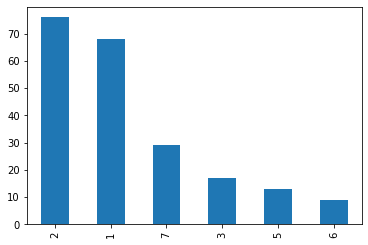

In [10]:
gl['Type'].value_counts().plot.bar()

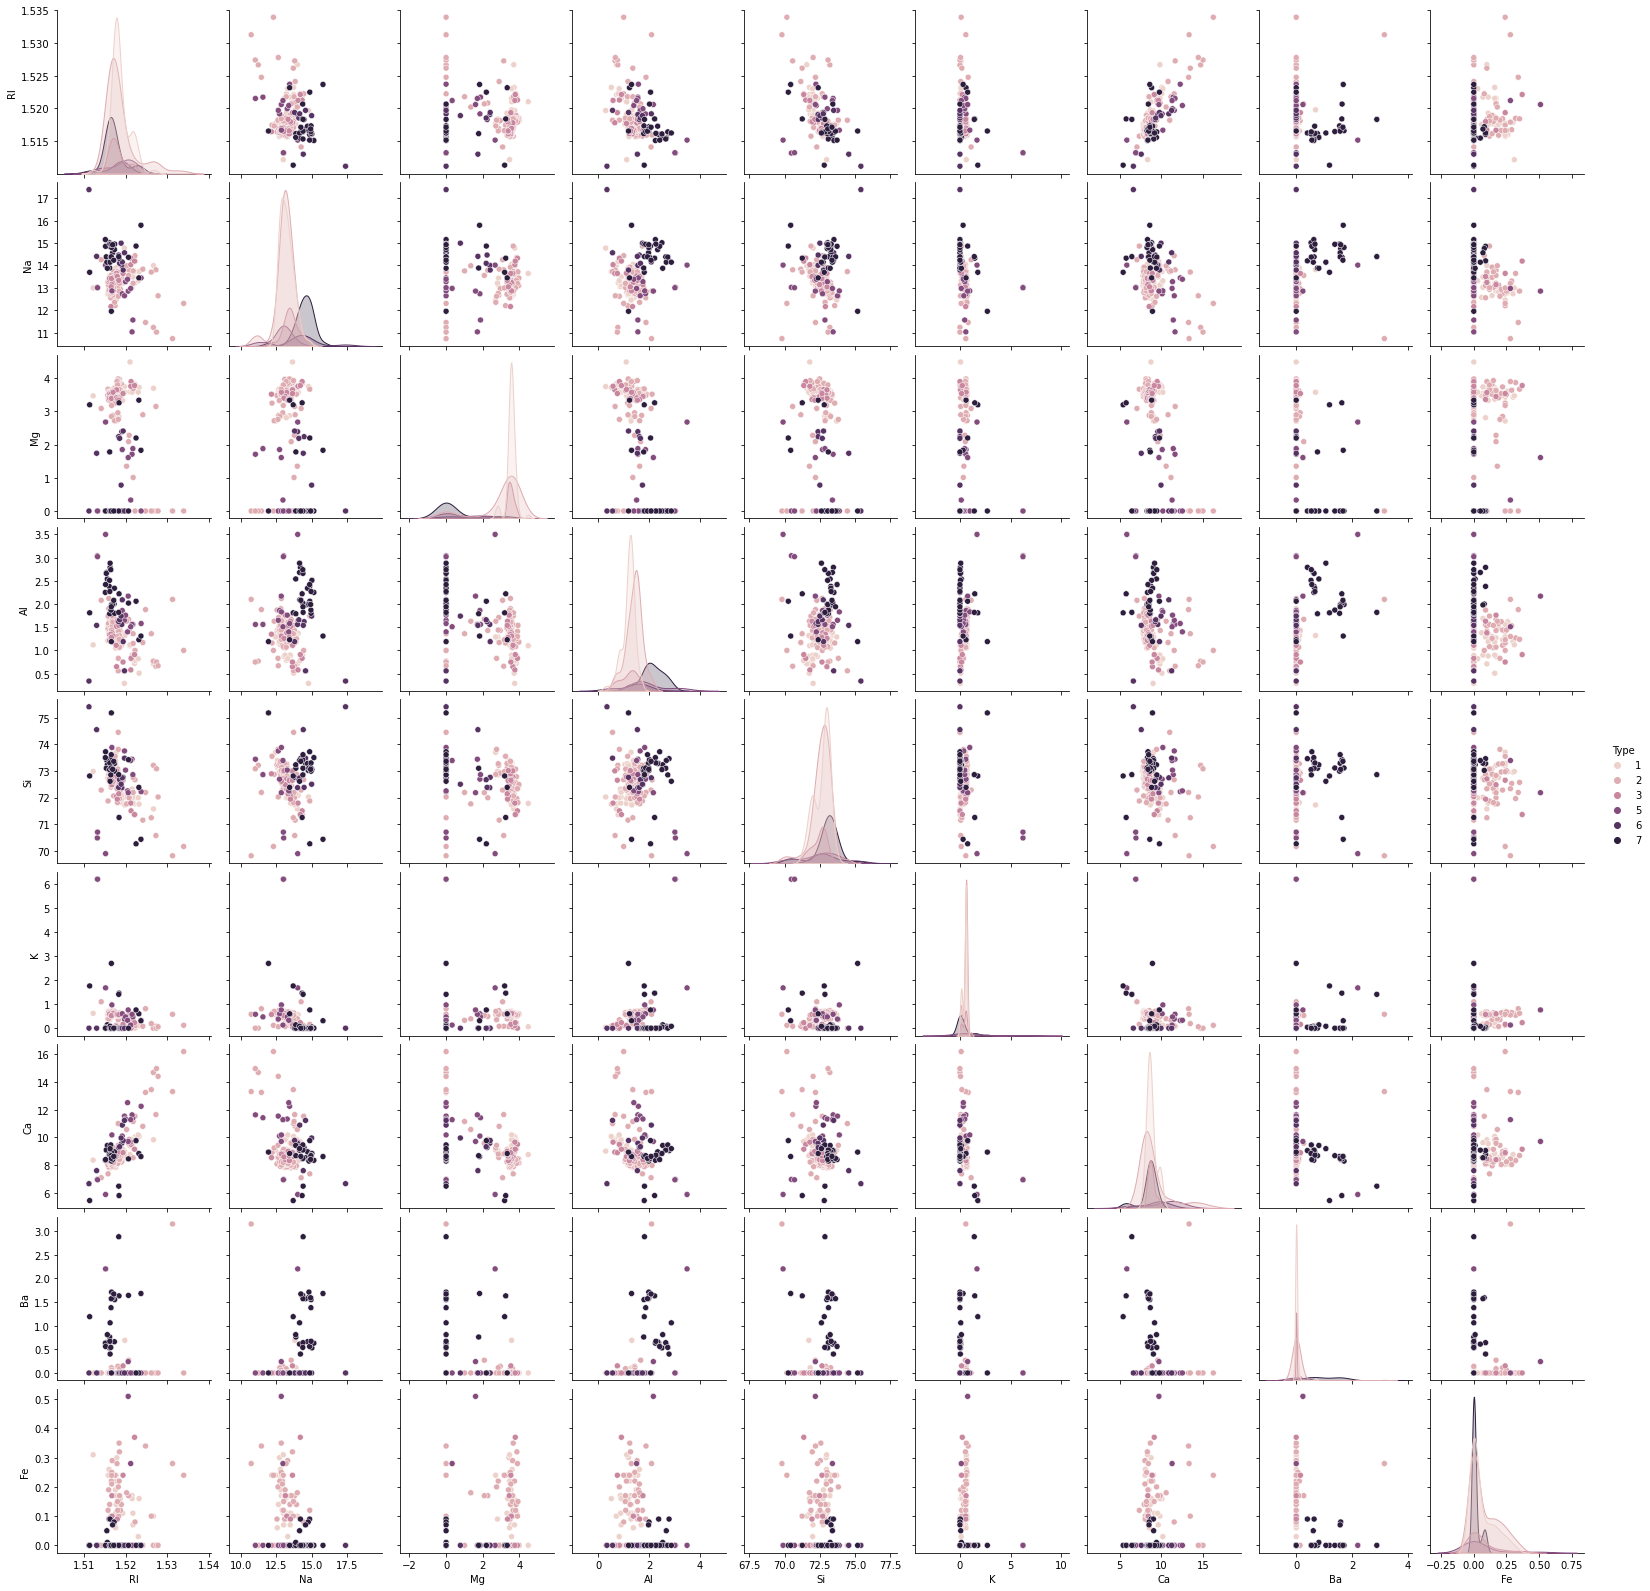

In [11]:
sns.pairplot(gl,hue='Type')
plt.show()

<AxesSubplot:>

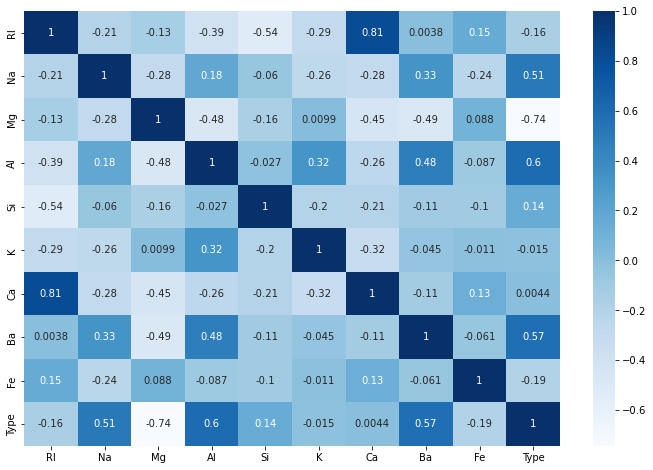

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(gl.corr(),annot=True,cmap='Blues')

We can see Ca and RI highly corrleated this makes sense as it was found that the Refractive index of glass was found to increase with the increase in Ca.(https://link.springer.com/article/10.1134/S1087659614030249)

# Apply Scaling

  Note: We are going to use MinMAx scaler as for KNN its best to use MinMax Scaler.
  We will also check with Standard scaler for testing purpose

# Applying Minmax scaler

In [13]:
# on individual feature level
RI_array=gl["RI"].values.reshape(-1,1)
Na_array=gl["Na"].values.reshape(-1,1)
Mg_array=gl["Mg"].values.reshape(-1,1)
Al_array=gl["Al"].values.reshape(-1,1)
Si_array=gl["Si"].values.reshape(-1,1)
K_array=gl["K"].values.reshape(-1,1)
Ca_array=gl["Ca"].values.reshape(-1,1)
Ba_array=gl["Ba"].values.reshape(-1,1)
Fe_array=gl["Fe"].values.reshape(-1,1)

In [14]:
scaler=MinMaxScaler()

gl["RI"]=scaler.fit_transform(RI_array)
gl["Na"]=scaler.fit_transform(Na_array)
gl["Mg"]=scaler.fit_transform(Mg_array)
gl["Al"]=scaler.fit_transform(Al_array)
gl["Si"]=scaler.fit_transform(Si_array)
gl["K"]=scaler.fit_transform(K_array)
gl["Ca"]=scaler.fit_transform(Ca_array)
gl["Ba"]=scaler.fit_transform(Ba_array)
gl["Fe"]=scaler.fit_transform(Fe_array)

In [15]:
gl.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0,1
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0,1
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0,1
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0,1
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0,1


In [16]:
X=gl.iloc[:,:-1]
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


In [17]:
y=gl.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 212, dtype: int64

# split train and test data

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [19]:
X_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
40,0.297629,0.309774,0.779510,0.258567,0.575000,0.103060,0.310409,0.000000,0.000000
116,0.313433,0.377444,0.868597,0.348910,0.450000,0.088567,0.267658,0.000000,0.196078
61,0.378402,0.463158,0.797327,0.320872,0.341071,0.019324,0.301115,0.219048,0.000000
189,0.548727,0.760902,0.407572,0.317757,0.110714,0.049919,0.295539,0.533333,0.000000
29,0.293679,0.353383,0.777283,0.308411,0.544643,0.096618,0.284387,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
170,0.550483,0.407519,0.000000,0.401869,0.430357,0.051530,0.632900,0.000000,0.000000
196,0.193591,0.472180,0.000000,0.700935,0.610714,0.022544,0.369888,0.257143,0.019608
200,0.172520,0.664662,0.000000,0.610592,0.658929,0.000000,0.270446,0.200000,0.000000
132,0.306409,0.406015,0.886414,0.277259,0.478571,0.093398,0.252788,0.000000,0.000000


# Create base Model 

In [20]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [21]:
y_pred=knn.predict(X_test)
y_train_pred=knn.predict(X_train)

In [22]:
y_pred

array([2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 7, 5, 2, 1, 1, 7, 1, 2, 2, 7, 1,
       2, 2, 1, 1, 5, 7, 1, 1, 1, 2, 2, 2, 2, 6, 1, 1, 2, 2, 5, 1, 2])

### Evaluate the KNN model

In [23]:
cf_5=confusion_matrix(y_test,y_pred)
cf_5

array([[13,  2,  0,  0,  0,  0],
       [ 4, 11,  0,  2,  0,  0],
       [ 3,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  1],
       [ 0,  1,  0,  0,  0,  3]])

In [24]:
ac_train_5=ac(y_train,y_train_pred)
ac_train_5

0.7455621301775148

In [25]:
ac_test_5=ac(y_test,y_pred)
ac_test_5

0.6744186046511628

In [26]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           1       0.65      0.87      0.74        15
           2       0.73      0.65      0.69        17
           3       0.00      0.00      0.00         3
           5       0.33      0.50      0.40         2
           6       1.00      0.50      0.67         2
           7       0.75      0.75      0.75         4

    accuracy                           0.67        43
   macro avg       0.58      0.54      0.54        43
weighted avg       0.65      0.67      0.65        43



# lets compare the train and test accuracy to check the overfitting

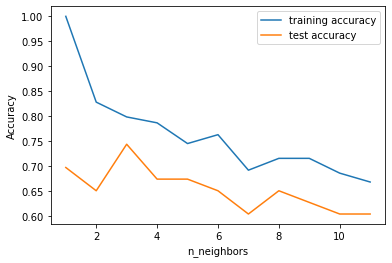

In [27]:
test_accuracy=[]
train_accuracy=[]

for i in range(1,12):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_train_pred=knn.predict(X_train)
    y_test_pred=knn.predict(X_test)# lets compare the train and test accuracy to check the overfitting
    tr_accuracy=ac(y_train,y_train_pred)
    te_accuracy=ac(y_test,y_test_pred)
    train_accuracy.append(tr_accuracy)
    test_accuracy.append(te_accuracy)
    
    
plt.plot(range(1,12),train_accuracy,label="training accuracy")
plt.plot(range(1,12),test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")   
plt.legend()

# Lets find the best K value

We can do this by either finding the accuracy rate or erro rate. For this assignment only using Accuracy rate.


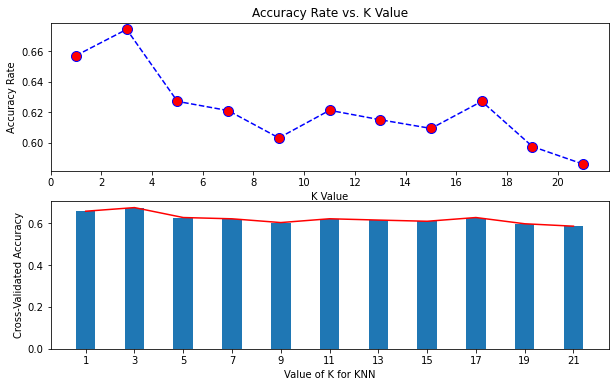

In [28]:
accuracy_rate = []

k_range=[2*i+1 for i in range(0,11)] # starting from 0 to choose values other than 1

for i in k_range:
#for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=5,scoring='accuracy')
    accuracy_rate.append(score.mean())


fig, ax = plt.subplots(2,1,figsize=(10,6) )
    
# first plot  
ax[0].plot(k_range,accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#ax[0].plot(range(1,20),accuracy_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
ax[0].set_title('Accuracy Rate vs. K Value')
ax[0].set_xlabel('K Value')
ax[0].set_ylabel('Accuracy Rate')
ax[0].set_xticks(np.arange(0, 22, step=2))


# Second plot 
ax[1].bar(k_range, accuracy_rate)
ax[1].plot(k_range, accuracy_rate,color="red")
ax[1].set_xlabel('Value of K for KNN')
ax[1].set_ylabel('Cross-Validated Accuracy')
ax[1].set_xticks(k_range)
#plt.ylim(0.6,1)
#ax[1].set_ylim(1,3)
plt.show()

In [29]:
np.argmax(accuracy_rate)

1

In [30]:
accuracy_rate

[0.6572192513368984,
 0.6745098039215687,
 0.6270944741532977,
 0.6210338680926916,
 0.603030303030303,
 0.6212121212121212,
 0.6149732620320856,
 0.6092691622103387,
 0.6270944741532978,
 0.5973262032085562,
 0.5857397504456328]

In [31]:
k_range[np.argmax(accuracy_rate)]

3

In [32]:
print("from the above the best K value =", k_range[np.argmax(accuracy_rate)])

from the above the best K value = 3


# Create a model with K=3

In [33]:
knn1=KNeighborsClassifier(n_neighbors=k_range[np.argmax(accuracy_rate)])
knn1.fit(X_train,y_train)
y_pred1=knn1.predict(X_test)

In [34]:
y_train_pred=knn1.predict(X_train)
ac_train_3=ac(y_train,y_train_pred)
ac_train_3

0.7988165680473372

In [35]:

ac_test_3=ac(y_test,y_pred1)
ac_test_3

0.7441860465116279

In [36]:
cf_1=confusion_matrix(y_test,y_pred1)
cf_1

array([[13,  2,  0,  0,  0,  0],
       [ 4, 12,  0,  1,  0,  0],
       [ 3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 1,  0,  0,  0,  0,  3]])

In [37]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           1       0.62      0.87      0.72        15
           2       0.86      0.71      0.77        17
           3       0.00      0.00      0.00         3
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       1.00      0.75      0.86         4

    accuracy                           0.74        43
   macro avg       0.69      0.72      0.69        43
weighted avg       0.73      0.74      0.72        43



Lets now try to tune pararmeters using GridSearchCV and StratifiedKFold

# GridSearchCV

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#sk= StratifiedKFold(n_splits=15,shuffle=True, random_state=None)

k_range=[2*i+1 for i in range(0,11)]

new_params={'n_neighbors':[x for x in k_range],
            'metric':['canberra','euclidean','minkowski']}

knn_grid=GridSearchCV(knn1,param_grid = new_params, cv =15,scoring='accuracy')

knn_grid.fit(X_train,y_train)

GridSearchCV(cv=15, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'metric': ['canberra', 'euclidean', 'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,
                                         21]},
             scoring='accuracy')

In [39]:
# Finding best parameter after tuning 

print("Best score is:",knn_grid.best_score_)
print("Best parameters are:",knn_grid.best_params_) 

Best score is: 0.7494949494949493
Best parameters are: {'metric': 'canberra', 'n_neighbors': 1}


In [40]:
## fitting the model 

grid= knn_grid.best_params_

knn_mm1=KNeighborsClassifier(n_neighbors=grid['n_neighbors'],metric=grid['metric'])
knn_mm1.fit(X_train,y_train)

knn_mm1_test_pred=knn_mm1.predict(X_test)
knn_mm1_train_pred=knn_mm1.predict(X_train)

In [41]:
ac_mm_test=ac(y_test, knn_mm1_test_pred)
ac_mm_test

0.6511627906976745

In [42]:
ac_mm_train=ac(y_train, knn_mm1_train_pred)
ac_mm_train

1.0

In [43]:
cf_mm1=confusion_matrix(y_test, knn_mm1_test_pred)
cf_mm1

array([[12,  2,  1,  0,  0,  0],
       [ 6,  8,  1,  1,  1,  0],
       [ 2,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  1,  0,  3]])

In [44]:
print(classification_report(y_test, knn_mm1_test_pred))

              precision    recall  f1-score   support

           1       0.60      0.80      0.69        15
           2       0.80      0.47      0.59        17
           3       0.33      0.33      0.33         3
           5       0.50      1.00      0.67         2
           6       0.67      1.00      0.80         2
           7       1.00      0.75      0.86         4

    accuracy                           0.65        43
   macro avg       0.65      0.73      0.66        43
weighted avg       0.70      0.65      0.64        43



# Lets check with Standard Scaler 

In [45]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [46]:
X=gl.iloc[:,:-1]
y=gl.iloc[:,-1]

In [47]:
X=scaler.fit_transform(X)
X

array([[ 0.88692912,  0.29421226,  1.25987642, ..., -0.14115355,
        -0.35474586, -0.59016889],
       [-0.23823986,  0.60104519,  0.64248691, ..., -0.78665386,
        -0.35474586, -0.59016889],
       [-0.71147269,  0.15920577,  0.60780211, ..., -0.8217354 ,
        -0.35474586, -0.59016889],
       ...,
       [ 0.76779358,  1.1778911 , -1.85481898, ..., -0.35865909,
         2.9377806 , -0.59016889],
       [-0.60226511,  1.20243773, -1.85481898, ..., -0.33059386,
         2.79724593, -0.59016889],
       [-0.40370588,  1.01833797, -1.85481898, ..., -0.23236555,
         2.99800974, -0.59016889]])

# split train and test data

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)

In [49]:
X_train

array([[-0.23823986,  0.60104519,  0.64248691, ..., -0.78665386,
        -0.35474586, -0.59016889],
       [-0.56586259, -0.67537981,  0.58005427, ..., -0.50600155,
        -0.23428758,  1.97367955],
       [ 0.45009881, -0.93311947, -1.85481898, ...,  1.80937999,
        -0.35474586, -0.59016889],
       ...,
       [ 0.45009881,  1.42335744, -1.85481898, ...,  1.59187445,
        -0.35474586, -0.59016889],
       [ 1.05570447, -0.34400024,  0.62861299, ...,  0.60959137,
        -0.35474586,  1.05069412],
       [-0.04298995, -0.9576661 ,  0.0597822 , ...,  0.32893907,
        -0.35474586,  1.46090987]])

# Create Base model

In [50]:
knn_std=KNeighborsClassifier(n_neighbors=5)
knn_std.fit(X_train,y_train)

KNeighborsClassifier()

In [51]:
y_test_pred=knn_std.predict(X_test)
y_train_pred=knn_std.predict(X_train)


# Evaluate the model

In [52]:
cf_5=confusion_matrix(y_test,y_test_pred)
cf_5

array([[15,  6,  0,  0,  0,  0],
       [ 3, 19,  0,  1,  0,  0],
       [ 2,  3,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  1,  0],
       [ 4,  0,  0,  0,  0,  7]])

In [53]:
ac_test_6=ac(y_test,y_test_pred)
ac_test_6

0.671875

In [54]:
ac_train_6=ac(y_train,y_train_pred)
ac_train_6

0.7432432432432432

In [55]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.62      0.71      0.67        21
           2       0.66      0.83      0.73        23
           3       0.00      0.00      0.00         5
           5       0.50      0.33      0.40         3
           6       1.00      1.00      1.00         1
           7       0.88      0.64      0.74        11

    accuracy                           0.67        64
   macro avg       0.61      0.59      0.59        64
weighted avg       0.63      0.67      0.64        64



# lets compare the train and test accuracy to check the overfitting

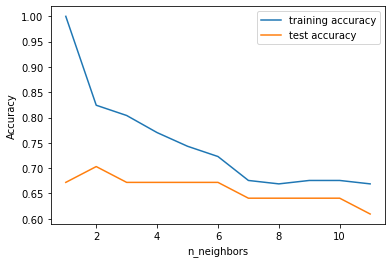

In [56]:
test_accuracy=[]
train_accuracy=[]

for i in range(1,12):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_train_pred=knn.predict(X_train)
    y_test_pred=knn.predict(X_test)# lets compare the train and test accuracy to check the overfitting
    tr_accuracy=ac(y_train,y_train_pred)
    te_accuracy=ac(y_test,y_test_pred)
    train_accuracy.append(tr_accuracy)
    test_accuracy.append(te_accuracy)
    
    
plt.plot(range(1,12),train_accuracy,label="training accuracy")
plt.plot(range(1,12),test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")   
plt.legend()

# Let find Best K value with error score

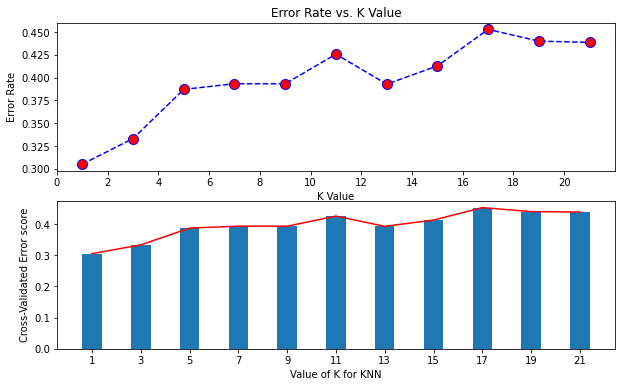

In [57]:
error_rate = []

k_range=[2*i+1 for i in range(0,11)] # starting from 0 to choose values other than 1

for i in k_range:
#for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')
    error_rate.append(1-score.mean())


fig, ax = plt.subplots(2,1,figsize=(10,6) )
    
# first plot  
#ax[0].plot(k_range,accuracy_rate,color='blue', linestyle='dashed', marker='o',
#         markerfacecolor='red', markersize=10)
ax[0].plot(k_range,error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
ax[0].set_title('Error Rate vs. K Value')
ax[0].set_xlabel('K Value')
ax[0].set_ylabel('Error Rate')
ax[0].set_xticks(np.arange(0, 22, step=2))


# Second plot 
ax[1].bar(k_range, error_rate)
ax[1].plot(k_range, error_rate,color="red")
ax[1].set_xlabel('Value of K for KNN')
ax[1].set_ylabel('Cross-Validated Error score')
ax[1].set_xticks(k_range)
#plt.ylim(0.6,1)
#ax[1].set_ylim(1,3)
plt.show()

In [58]:
np.argmin(error_rate)

0

In [59]:
k_range[np.argmin(error_rate)]

1

In [60]:
print("from the above the best K value =", k_range[np.argmin(error_rate)])

from the above the best K value = 1


In [61]:
error_rate

[0.3052380952380953,
 0.33333333333333337,
 0.38714285714285723,
 0.3933333333333333,
 0.3933333333333333,
 0.4257142857142857,
 0.3928571428571428,
 0.4128571428571428,
 0.45285714285714274,
 0.44000000000000006,
 0.4385714285714285]

# Create a model with K=1

In [62]:
knn1=KNeighborsClassifier(n_neighbors=k_range[np.argmin(error_rate)])
knn1.fit(X_train,y_train)
y_pred1=knn1.predict(X_test)

In [63]:
y_train_pred=knn1.predict(X_train)
ac_train_4=ac(y_train,y_train_pred)
ac_train_4

1.0

In [64]:

ac_test_4=ac(y_test,y_pred1)
ac_test_4

0.671875

In [65]:
cf_1=confusion_matrix(y_test,y_pred1)
cf_1

array([[13,  4,  4,  0,  0,  0],
       [ 4, 18,  0,  1,  0,  0],
       [ 2,  2,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  1],
       [ 0,  0,  0,  0,  1,  0],
       [ 2,  1,  0,  0,  0,  8]])

In [66]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           1       0.62      0.62      0.62        21
           2       0.72      0.78      0.75        23
           3       0.20      0.20      0.20         5
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00         1
           7       0.89      0.73      0.80        11

    accuracy                           0.67        64
   macro avg       0.68      0.67      0.67        64
weighted avg       0.68      0.67      0.67        64



# GridSearchCV

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

k_range=[2*i+1 for i in range(0,11)]

sk= StratifiedKFold(n_splits=15,shuffle=True, random_state=None)

new_params={'n_neighbors':[x for x in k_range],
            'metric':['canberra','euclidean','minkowski']}

knn_grid=GridSearchCV(knn_std,param_grid = new_params, cv =sk,scoring='accuracy')

knn_grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=15, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['canberra', 'euclidean', 'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,
                                         21]},
             scoring='accuracy')

In [68]:
# Finding best parameter after tuning 

print("Best score for GridSearchCV is:",knn_grid.best_score_)
print("Optimal parameters for GridSearchCV is:",knn_grid.best_params_) 

Best score for GridSearchCV is: 0.742962962962963
Optimal parameters for GridSearchCV is: {'metric': 'canberra', 'n_neighbors': 5}


In [69]:
## fitting the model 

grid1= knn_grid.best_params_

knn_std1=KNeighborsClassifier(n_neighbors=grid1['n_neighbors'],metric=grid['metric'])
knn_std1.fit(X_train,y_train)

knn_std1_test_pred=knn_std1.predict(X_test)
knn_std1_train_pred=knn_std1.predict(X_train)

In [70]:
ac_std_test=ac(y_test, knn_std1_test_pred)
ac_std_test

0.734375

In [71]:
ac_std_train=ac(y_train, knn_std1_train_pred)
ac_std_train

0.7837837837837838

In [72]:
conf_matrix_std=confusion_matrix(y_test, knn_std1_test_pred)
conf_matrix_std

array([[19,  2,  0,  0,  0,  0],
       [ 4, 18,  0,  1,  0,  0],
       [ 4,  1,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  1,  9]])

In [73]:
print(classification_report(y_test, knn_std1_test_pred))

              precision    recall  f1-score   support

           1       0.70      0.90      0.79        21
           2       0.75      0.78      0.77        23
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         3
           6       0.50      1.00      0.67         1
           7       0.90      0.82      0.86        11

    accuracy                           0.73        64
   macro avg       0.48      0.58      0.51        64
weighted avg       0.66      0.73      0.69        64



# Final result

In [74]:
r={'models':['base_MM',"revised_MM","gridcv_MM","base_std","revised_std","gridcv_std"],
                      'Train Scores':[ac_train_5,ac_train_3,ac_mm_train,ac_train_6,ac_train_4,ac_std_train],
                      'Test Scores': [ac_test_5,ac_test_3,ac_mm_test,ac_test_6,ac_test_4,ac_std_test],
                      'n_neighbours':[5,k_range[np.argmax(accuracy_rate)],grid['n_neighbors'],5,
                                      k_range[np.argmin(error_rate)],grid1['n_neighbors']]
                      }

results=pd.DataFrame(r)
results

,models,Train Scores,Test Scores,n_neighbours
0,base_MM,0.745562,0.674419,5
1,revised_MM,0.798817,0.744186,3
2,gridcv_MM,1.000000,0.651163,1
3,base_std,0.743243,0.671875,5
4,revised_std,1.000000,0.671875,1
5,gridcv_std,0.783784,0.734375,5


# From the above we will go with the revised model(Minmax scaler) with K=3

Please note , the test data allocation is very small due to less records in the data set, overfitting is expected as we can see in case of GridCV_MM and Revised_std..